# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description and a Project Overview 

The film industry is a vibrant ecosystem where creativity, economics, and audience preferences intersect. With thousands of movies produced each year, understanding the factors that drive their popularity and financial success is not only intriguing but also critical for filmmakers, investors, and marketers.

This project delves into a dataset of 10,000 movies sourced from The Movie Database (TMDb), encompassing information on user ratings, cast, director, genres, budgets, popularity, revenues and so on. By leveraging this rich dataset, we aim to explore two fundamental aspects of the movie industry:

1) Genre Trends and Audience Preferences: How have movie genres evolved in popularity over time, and what trends or shifts in audience preferences can be identified?

2) Determinants of Financial Success: What movie properties, such as budget, genre, or user ratings, are most strongly associated with high revenues?


### Question(s) for Analysis

**Question 1 and other questions related**: Which genres are most popular from year to year, and how do they compare overall in the sample?
    1.1) How does the popularity of each genre change over the years? Are there any trends or shifts in audience preferences?
    1.2) How can we statistically compare the total popularity of all genres in the dataset?
    1.3) Are there any genres with consistent popularity across all years, or do certain genres show spikes in specific periods?
    1.4) Can we identify statistically significant differences in popularity between genres over the years, and if so, which genres stand out the most?
    
**Question 2 and other questions related**: What kinds of properties are associated with movies that have high revenues?
    2.1) How strongly do properties such as budget, popularity, and vote average correlate with revenue? Are these correlations consistent over time?
    2.2) Are certain genres disproportionately represented among high-revenue movies, and do they show statistically significant differences in mean revenue?
    2.3) Can we identify whether high revenue is primarily driven by higher budgets or by other factors like popularity, vote averages, or adjusted budgets?
    2.4) How do movies with high revenues differ in terms of their statistical distributions for these properties when compared to the overall dataset?
    
**Project Goals**:

By addressing these questions, this project seeks to provide actionable insights into the dynamics of audience preferences and the financial underpinnings of cinematic success. Whether the researcher is an industry stakeholder or a data enthusiast, this analysis will illuminate the trends and properties shaping the global movie landscape.

First of all, it's necessary to import libraries.

In [141]:
# Use this cell to set up import statements for all of the packages that I
#   plan to use.
import pandas as pd
import numpy as np
import zipfile
import os

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will load in the data, check for cleanliness, and then trim and clean my dataset for analysis.

Loading data here by specifying the path to the csv, read and display it.

Here I will specify the path to the CSV file to access it.

In [142]:
# Specify the path to the CSV file
csv_file_path = 'Database_TMDb_movie_data/tmdb-movies.csv'  # Adjust the path if necessary

Then I will Read the CSV file into a DataFrame

In [143]:
# Read the CSV file into a DataFrame
tmdb_movies_df = pd.read_csv(csv_file_path)

Last, I will display the first few rows of the DataFrame

In [144]:
# Display the first few rows of the DataFrame
print(tmdb_movies_df.head(10))

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   
5  281957  tt1663202    9.110700  135000000   532950503   
6   87101  tt1340138    8.654359  155000000   440603537   
7  286217  tt3659388    7.667400  108000000   595380321   
8  211672  tt2293640    7.404165   74000000  1156730962   
9  150540  tt2096673    6.326804  175000000   853708609   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   
5                  The Revenant   
6            Terminator Genisys   
7                   The Martian   
8                       Minions   


### Data Cleaning
Once I have accessed it, it's time to clean it from nulls or NaN if needed, or data that have to be removed or treated. 

It's important to know if I am dealing with nulls on the firsts and lasts raws. If so, I have to remove them or set the limit of my dataframe.

In [145]:
# Check if the first row has any null values
first_row_null = tmdb_movies_df.isnull().iloc[0].any()
print("Does the first row contain null values?", first_row_null)

Does the first row contain null values? False


In [146]:
# Check if the last row has any null values
first_row_null = tmdb_movies_df.isnull().iloc[-1].any()
print("Does the last row contain null values?", first_row_null)

Does the last row contain null values? True


Now I will verify the limit of data frame.

In [147]:
# Get the index of the last non-null value for each column
last_non_null_indices = tmdb_movies_df.apply(lambda col: col.last_valid_index())
print("Last non-null indices for each column:\n", last_non_null_indices)

Last non-null indices for each column:
 id                      10865
imdb_id                 10865
popularity              10865
budget                  10865
revenue                 10865
original_title          10865
cast                    10865
homepage                10819
director                10865
tagline                 10865
keywords                10865
overview                10865
runtime                 10865
genres                  10865
production_companies    10865
release_date            10865
vote_count              10865
vote_average            10865
release_year            10865
budget_adj              10865
revenue_adj             10865
dtype: int64


Setting the limit on 10865.

In [148]:
# Limit the DataFrame to rows up to the last non-null index
limited_df = tmdb_movies_df.loc[:10865]
print("Limited DataFrame:\n", limited_df)

Limited DataFrame:
            id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10861      21  tt0060371    0.080598          0           0   
10862   20379  tt0060472    0.065543          0           0   
10863   39768  tt0060161    0.065141          0           0   
10864   21449  tt0061177    0.064317          0           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4                         Fu

In [149]:
# Check if there are any null values in the entire DataFrame
any_nulls = tmdb_movies_df.isnull().any().any()
print("Are there any null values in the DataFrame?", any_nulls)

Are there any null values in the DataFrame? True


In [150]:
# Get a summary of null values in each column
null_summary = tmdb_movies_df.isnull().sum()
print("Number of null values in each column:\n", null_summary)

Number of null values in each column:
 id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


Now I must verify some issues like movies with revenue and budget values that were zero dollars.
Thins is part of the cleaning the data.

First, confirm the extent of the issue by inspecting the distribution of the revenue and budget columns:

In [151]:
# Inspect the distribution of revenue and budget values
print("Revenue column summary:\n", limited_df['revenue'].describe())
print("Budget column summary:\n", limited_df['budget'].describe())

# Check the percentage of rows with zero values in revenue or budget
zero_revenue_percentage = (limited_df['revenue'] == 0).mean() * 100
zero_budget_percentage = (limited_df['budget'] == 0).mean() * 100

print(f"Percentage of movies with zero revenue: {zero_revenue_percentage:.2f}%")
print(f"Percentage of movies with zero budget: {zero_budget_percentage:.2f}%")

Revenue column summary:
 count    1.086600e+04
mean     3.982332e+07
std      1.170035e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.400000e+07
max      2.781506e+09
Name: revenue, dtype: float64
Budget column summary:
 count    1.086600e+04
mean     1.462570e+07
std      3.091321e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      4.250000e+08
Name: budget, dtype: float64
Percentage of movies with zero revenue: 55.37%
Percentage of movies with zero budget: 52.42%


I decided how to Handle Zero Values by dropping them.

In [152]:
# Drop rows where revenue or budget is zero
limited_df = limited_df[(limited_df['revenue'] > 0) & (limited_df['budget'] > 0)]

After addressing zero values, I will confirm how much data remains:

In [153]:
# Check the number of rows after handling zero values
print("Remaining rows after cleaning:", limited_df.shape[0])

Remaining rows after cleaning: 3855


For a statistical analysis of genres, I need to handle cases where movies are associated with multiple genres listed in a single cell (e.g., 'Romance|Drama'). To ensure accurate analysis, I will split these entries so that each genre is treated as an independent occurrence, allowing for proper grouping and statistical evaluation without altering the original revenue data.

In [154]:
# Cleaning genres:
# Step 1: Split the genres by '|' into lists, then convert to NumPy arrays
limited_df['genres'] = limited_df['genres'].str.split('|').apply(np.array)

Now, the rows countains arrays of genres. But I still need to separate these data. For this, I need to explode data into separate rows by genre.

In [155]:
# Step 2: Explode the genres into separate rows
df_exploded = limited_df.explode('genres')

In [156]:
# Display the resulting DataFrame
print(df_exploded)

           id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
0      135397  tt0369610   32.985763  150000000  1513528810   
0      135397  tt0369610   32.985763  150000000  1513528810   
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
...       ...        ...         ...        ...         ...   
10835    5923  tt0060934    0.299911   12000000    20000000   
10835    5923  tt0060934    0.299911   12000000    20000000   
10835    5923  tt0060934    0.299911   12000000    20000000   
10848    2161  tt0060397    0.207257    5115000    12000000   
10848    2161  tt0060397    0.207257    5115000    12000000   

           original_title                                               cast  \
0          Jurassic World  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
0          Jurassic World  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
0  

# <a id='eda'></a>
## Exploratory Data Analysis

### Question 1 (Which genres are most popular from year to year?)

After exploding, I will group this data frame by year and genres to plotting in graph and show popularity through the years.

In [157]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

# Group by release year and genre, then calculate the sum of popularity
genre_popularity = df_exploded.groupby(['release_year', 'genres'])['popularity'].sum().reset_index()

In [158]:
# Show 
genre_popularity.head(10)

release_year     genres  popularity
0          1960     Action    3.009075
1          1960  Adventure    1.872132
2          1960     Comedy    1.003128
3          1960      Drama    4.694612
4          1960    History    1.136943
5          1960     Horror    2.610362
6          1960    Romance    1.003128
7          1960   Thriller    2.610362
8          1960    Western    1.872132
9          1961     Action    0.928279

In [159]:
genre_frequency = genre_popularity['genres'].value_counts()

In [160]:
# Pivot the data so that genres are columns, release_year is the index, and popularity is the values
pivot_df = genre_popularity.pivot(index='release_year', columns='genres', values='popularity')

In [161]:
# Create a sequential index for frequency
genre_popularity['frequency'] = range(1, len(genre_popularity) + 1)

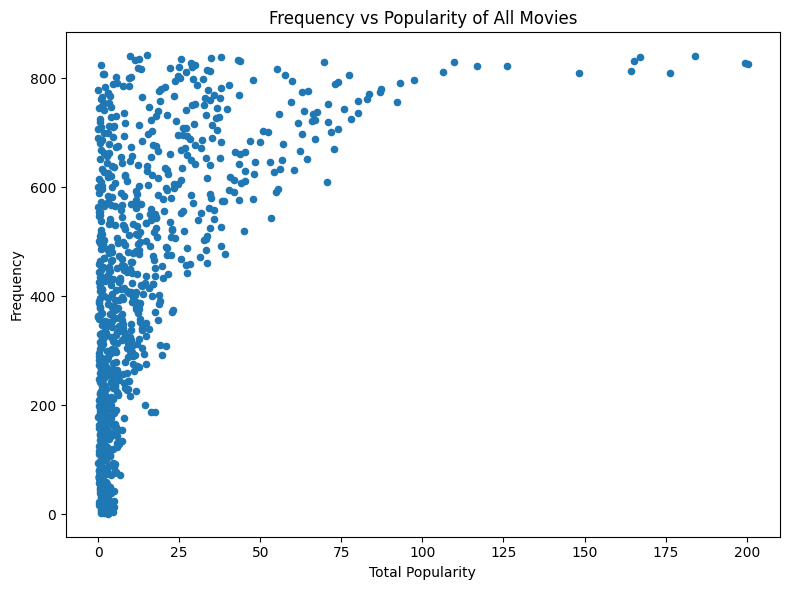

In [162]:
# Plot the data
ax = genre_popularity.plot(
    x='popularity', 
    y='frequency', 
    kind='scatter', 
    title="Frequency vs Popularity of All Movies",
    figsize=(8, 6)
)

# Add axis labels
ax.set_xlabel("Total Popularity")
ax.set_ylabel("Frequency")

# Adjust layout
ax.figure.tight_layout()

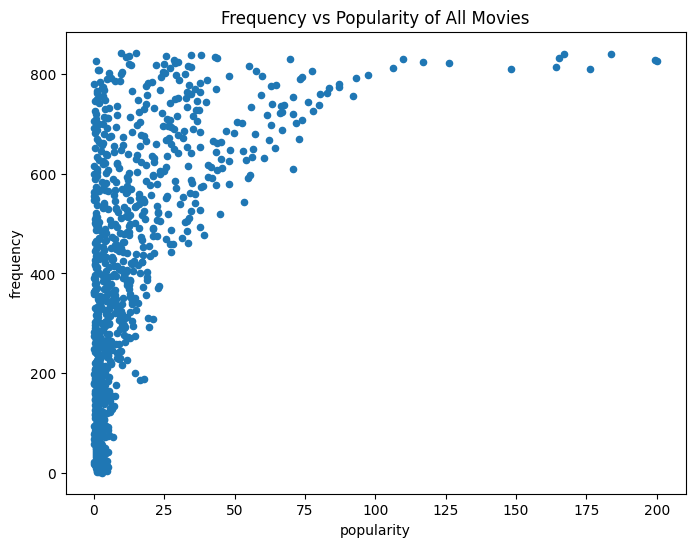

The simple graph 1d just above illustrates the frequency distribution of popularity. Even after filtering the data to exclude records with zero revenue and budget, there are still a few entries with null popularity. I chose not to remove these entries because it is plausible that some movies, even after being produced and streamed, may not have garnered any popularity.

Now let's make an analysis with more dimensions, like popularity (i) of genres (ii) through the years (iii).

Calculate the total popularity of each genre

In [163]:
# Calculate the total popularity of each genre
total_popularity = pivot_df.sum(axis=0)

Sort genres (columns) based on total popularity in descending order. This is needed to make legend ordered by frequency and answer question 1 and its detailed questions.

In [164]:
# Sort genres (columns) based on total popularity in descending order
sorted_columns = total_popularity.sort_values(ascending=False).index
# **This is needed to make legend ordered by frequency and answer question 1 and its detailed questions**

Reorder the columns in the DataFrame.

In [165]:
# Reorder the columns in the DataFrame
pivot_sorted = pivot_df[sorted_columns]

### Question 1) Which genres are most popular from year to year?

To answer this question, I must first plot the sorted DataFrame.

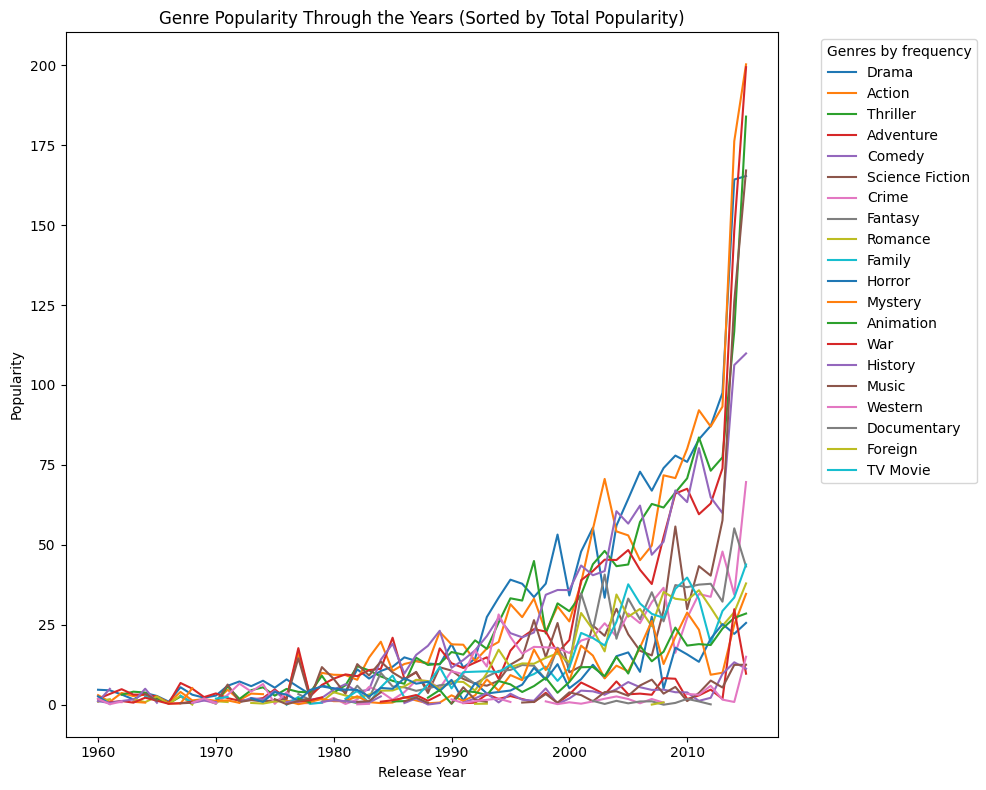

In [166]:
# Plot the sorted DataFrame
bx = pivot_sorted.plot(
    kind='line',
    figsize=(10, 8),
    title="Genre Popularity Through the Years (Sorted by Total Popularity)"
)

# Add axis labels
bx.set_xlabel("Release Year")
bx.set_ylabel("Popularity")

# Adjust layout for better readability
bx.legend(title="Genres by frequency", bbox_to_anchor=(1.05, 1), loc='upper left')
bx.figure.tight_layout()

The same image image in full size down as markdown:

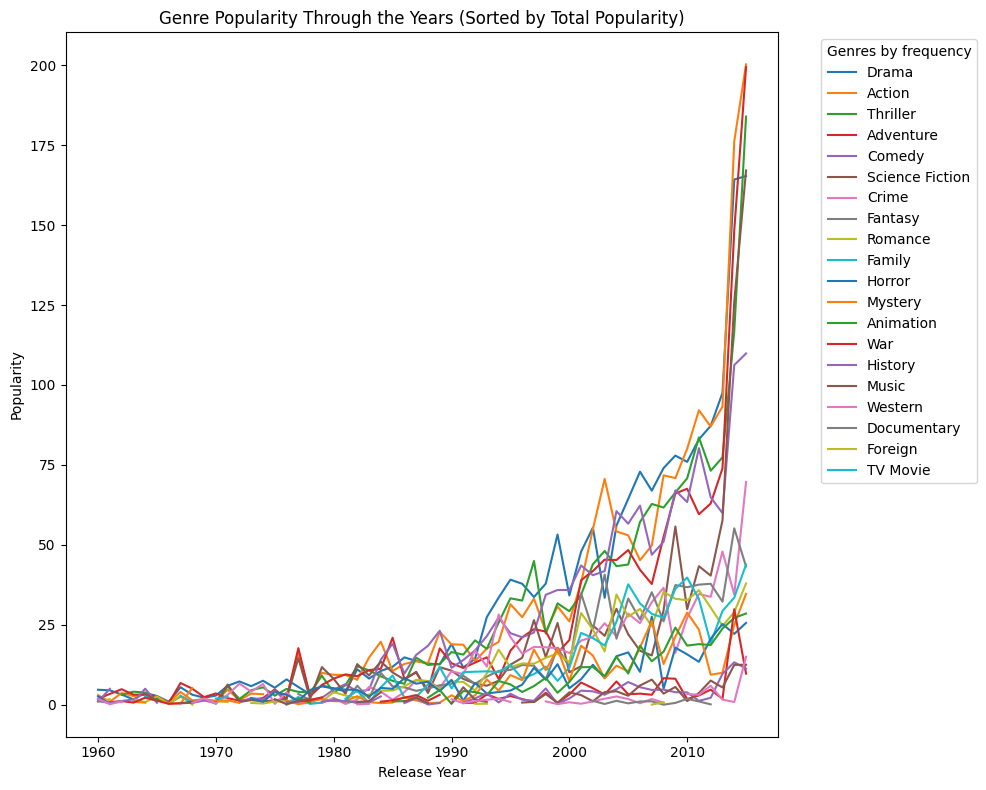

**Answer:** Analyzing the first graph, which orders genres by frequency, it becomes evident that Drama consistently ranks as the most popular genre, followed by Comedy, Thriller, Action, Romance, Horror, Adventure, Crime, Family, and Science Fiction, with other genres being less prominent. This observation provides a general overview, which will be refined through further analysis in subsequent graphs.

### 1.1) How does the popularity of each genre change over the years? Are there any trends or shifts in audience preferences?


**Answer:** For example, the data reveals that Drama consistently leads in popularity, experiencing steady growth over most periods. However, during the late 1980s, Comedy briefly surpasses it, indicating a temporary shift in audience preferences. In the mid-1980s, a notable diversification in audience interest emerges, with genres like Drama, Comedy, and Thriller beginning to dominate the landscape together.

Moving into the 2000s and 2010s, we observe another significant shift, where genres such as Science Fiction and Adventure rise closer to the top, reflecting evolving audience preferences likely influenced by advancements in technology, special effects, the global success of blockbuster franchises, afterwise giving place to online streaming industry. These changes highlight both periods of stability in audience taste and moments of dynamic transformation driven by cultural, technological, and industry trends.

### 1.2) How can we statistically compare the total popularity of all genres in the dataset?

**Answer:** To statistically compare the total popularity of all genres, we can use a pie chart to visualize the relative contributions of each genre to the overall popularity. However, as there are many genres in the dataset, a pie chart will likely become cluttered and difficult to interpret. Some genres will contribute very little to the total, making it hard to distinguish them. To address this, we can group the smaller categories (those contributing below a certain threshold, e.g., 2%) into a single "Other" category through a function called group_small_categories. This method helps to simplify the chart and focus on the most significant genres, making the overall comparison more clear and meaningful.

Additionally, the statistical comparison can be supported by looking at the percentage distribution of popularity across genres, where genres with higher percentages indicate greater influence on the total popularity. Grouping smaller categories helps highlight the dominant genres without losing important contextual information.

Here I must use 1 function to avoid repetitive code at grouping small categories to plot some pie charts to avoid overlapping.

In [167]:
def group_small_categories(series, threshold=0.02):
    """
    Group categories in a pandas Series with percentages below a threshold into an "Other" category.

    Parameters:
    - series (pd.Series): A Series containing numerical values (e.g., counts or totals).
    - threshold (float): The minimum percentage for a category to not be grouped into "Other".
    - other_label (str): The label for the grouped "Other" category.

    Returns:
    - pd.Series: A Series with smaller categories grouped into "Other".
    """
    total = series.sum()
    percentages = series / total
    grouped = series[percentages >= threshold]
    grouped['Other'] = series[percentages < threshold].sum()
    return grouped

Now I will group by genres and calculate the total popularity

In [168]:
# Group by genres and calculate the total popularity
total_genre_popularity = genre_popularity.groupby('genres')['popularity'].sum()

Now I will apply the function to group small genres into "Other"

In [169]:
# Apply the function to group small genres into "Other"
grouped_genre_popularity = group_small_categories(total_genre_popularity, threshold=0.02)

Create the pie chart with small categories grouped

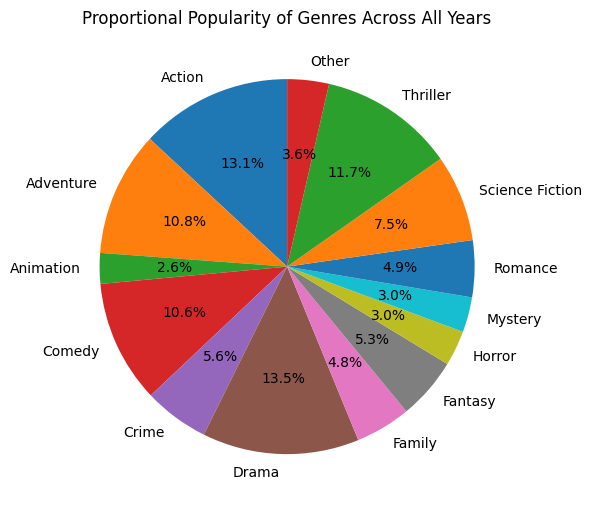

In [170]:
# Create the pie chart
cx = grouped_genre_popularity.plot(
    kind='pie',
    autopct='%1.1f%%',  # Display percentages
    startangle=90,  # Start angle for better visual balance
    figsize=(6, 6),  # Adjust figure size
    title="Proportional Popularity of Genres Across All Years"
)

# Remove the y-label for aesthetics
cx.set_ylabel('')
cx.figure.tight_layout()

The same image image in full size down as markdown:

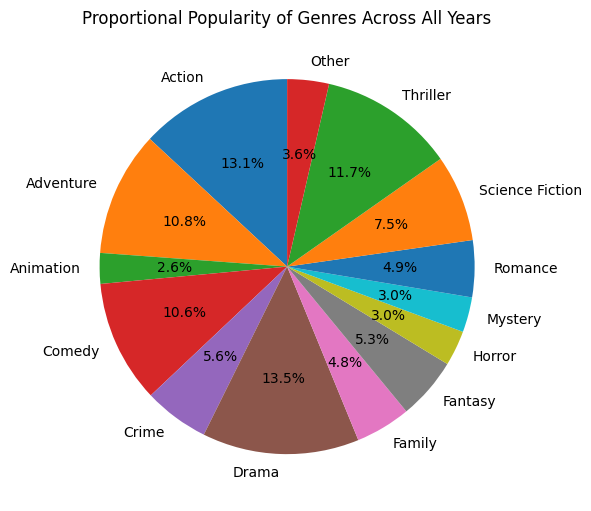

### 1.3) Are there any genres with consistent popularity across all years, or do certain genres show spikes in specific periods? 

**Answer:** By examining the genre popularity across the years, we can identify whether any genres have maintained consistent popularity over time or if certain genres experienced spikes during specific periods.

For example, genres like Drama may show steady popularity over the years, suggesting a consistent audience demand for these types of movies. On the other hand, genres such as Action or Comedy may show significant spikes in specific decades, indicating shifts in audience preferences or the rise of certain blockbuster trends during those periods (e.g., the explosion of action films in the late 80s and early 90s).

To quantitatively assess this, we can use time series analysis and visualizations (such as line plots used above or area plots used ) that track the popularity of each genre year by year. By comparing trends, we can identify which genres show steady patterns and which ones exhibit more volatile or cyclical behavior. Additionally, statistical methods like correlation analysis or variance can help confirm whether these trends are significant or just random fluctuations.

Here, I present an area plot to highlight the proportional representation of genres over time. This visualization emphasizes how the prevalence of each genre evolves, allowing us to observe trends and shifts in audience preferences across different periods.

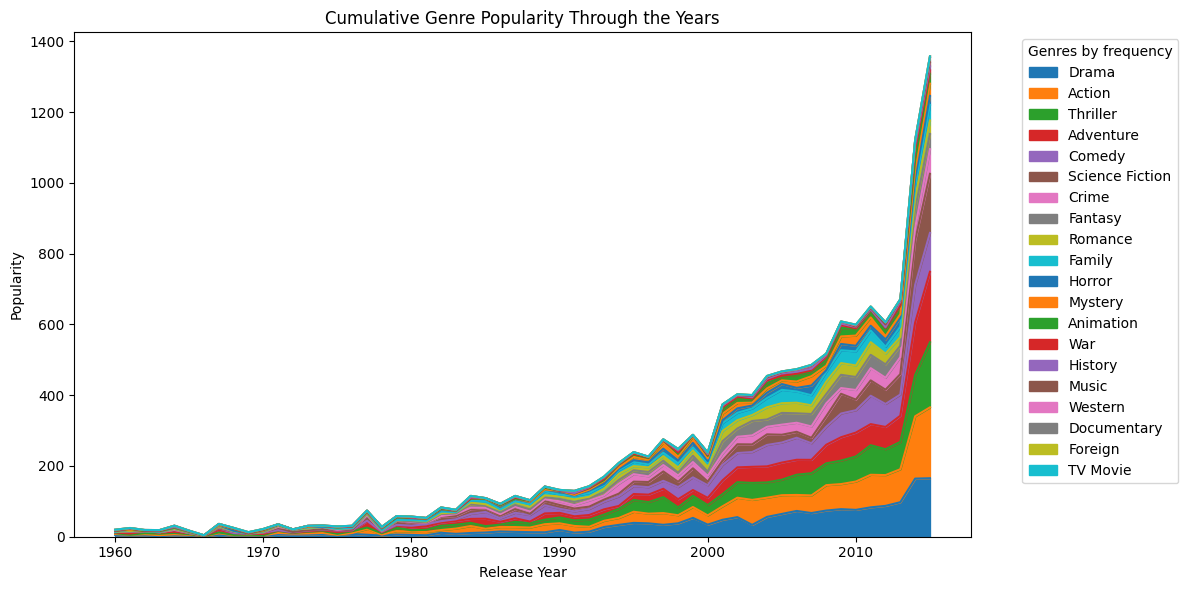

In [171]:
# Area plot
dx = pivot_sorted.plot(
    kind='area',
    stacked=True,
    figsize=(12, 6),
    title="Cumulative Genre Popularity Through the Years"
)

dx.set_xlabel("Release Year")
dx.set_ylabel("Popularity")
dx.legend(title="Genres by frequency", bbox_to_anchor=(1.05, 1), loc='upper left')
dx.figure.tight_layout()

The same image image in full size down as markdown:

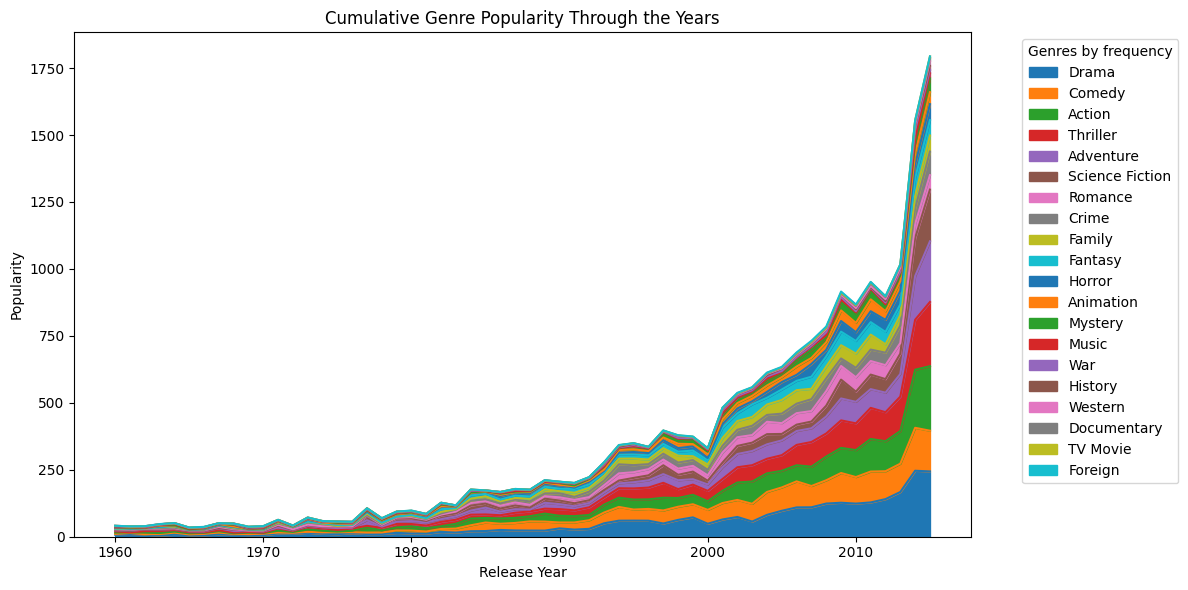

Next, I will reuse the pivoted table, pivot_df and sum its data to create a bar chart for better visualization of the data.

In [172]:
# Calculate the total frequency of each genre
genre_totals = pivot_df.sum(axis=0)

Now I will Reorder columns based on frequency to prepate legend. 

In [173]:
# Reorder the columns based on frequency
sorted_columns = genre_totals.sort_values(ascending=False).index
pivot_df = pivot_df[sorted_columns]

Now I will show a bar plot using Pandas.

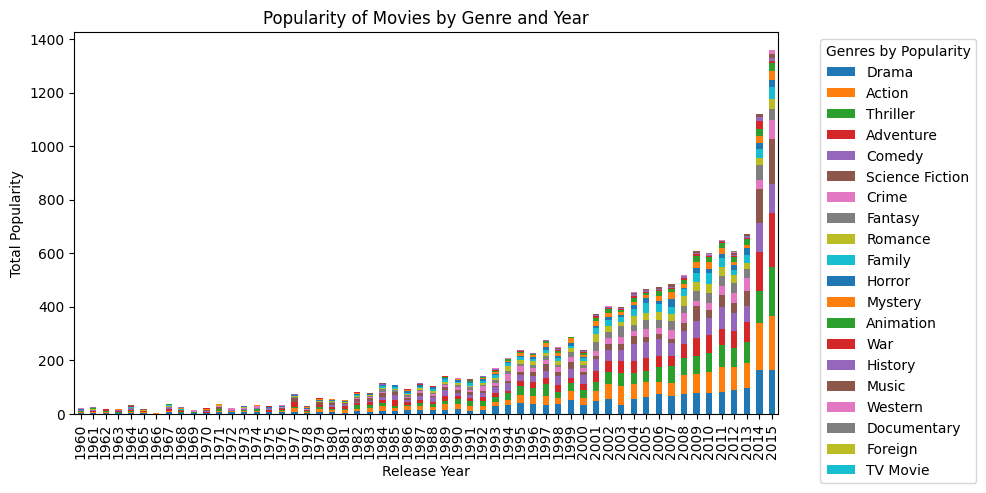

In [174]:
# Plot using Pandas' bar plot
ex = pivot_df.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 5),
    title="Popularity of Movies by Genre and Year"
)

# Customize the axes and legend
ex.set_xlabel("Release Year")
ex.set_ylabel("Total Popularity")
ex.legend(title="Genres by Popularity", bbox_to_anchor=(1.05, 1), loc='upper left')
ex.figure.tight_layout()

The same image image in full size down as markdown:

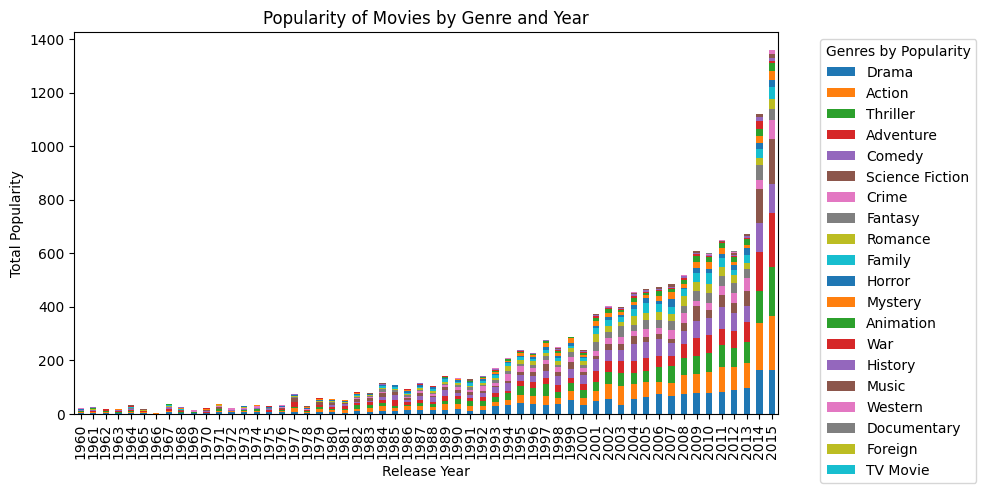

Now it's time to count the occurrences of each genre to prepare my pie chart.

In [175]:
#Count the occurrences of each genre for pie chart
genre_counts = df_exploded['genres'].value_counts()

Now I'm appling once again the function to group small genres to avoid repetitive coding.

In [176]:
# Apply the function to group small genres
genre_counts_grouped = group_small_categories(genre_counts, threshold=0.02)

Plotting the pie chart.

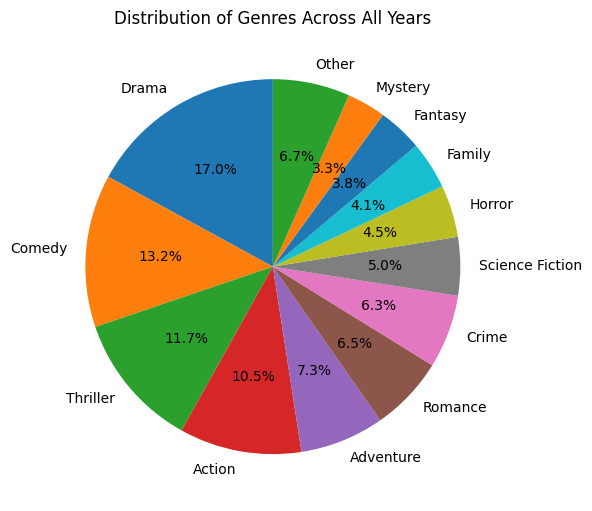

In [177]:
# Plotting the pie chart
fx = genre_counts_grouped.plot(
    kind='pie',
    autopct='%1.1f%%',  # Display percentages
    startangle=90,  # Start angle for better visual balance
    figsize=(6, 6),  # Adjust figure size
    title="Distribution of Genres Across All Years"
)

# Remove the y-label for aesthetics
fx.set_ylabel('')
fx.figure.tight_layout()

The same image image in full size down as markdown:

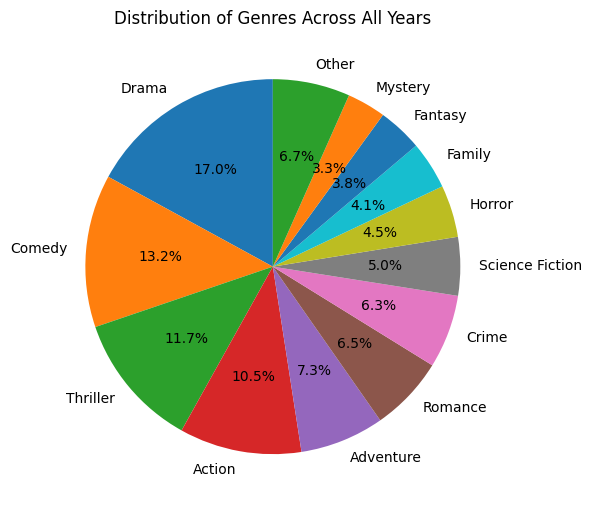

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

Ordering by revenue to show some properties of the movies with the highest revenue.

Question 2 and other questions related: What kinds of properties are associated with movies that have high revenues? 2.1) How strongly do properties such as budget, popularity, and vote average correlate with revenue? Are these correlations consistent over time? 2.2) Are certain genres disproportionately represented among high-revenue movies, and do they show statistically significant differences in mean revenue? 2.3) Can we identify whether high revenue is primarily driven by higher budgets or by other factors like popularity, vote averages, or adjusted budgets? 2.4) How do movies with high revenues differ in terms of their statistical distributions for these properties when compared to the overall dataset? 2.5) Can we determine if the relationship between revenue and other properties is linear or if certain thresholds (e.g., a minimum budget) disproportionately affect revenue outcomes?

In [178]:
#Order by revenue
tmdb_movies_df_sorted = df_exploded.sort_values(
    by='revenue',
    ascending=False,
    na_position='first',
    ignore_index=True
)
tmdb_movies_df_sorted.head(1)

id    imdb_id  popularity     budget     revenue original_title  \
0  19995  tt0499549    9.432768  237000000  2781505847         Avatar   

                                                cast  \
0  Sam Worthington|Zoe Saldana|Sigourney Weaver|S...   

                      homepage       director                      tagline  \
0  http://www.avatarmovie.com/  James Cameron  Enter the World of Pandora.   

   ...                                           overview runtime  genres  \
0  ...  In the 22nd century, a paraplegic Marine is di...     162  Action   

                                production_companies release_date vote_count  \
0  Ingenious Film Partners|Twentieth Century Fox ...     12/10/09       8458   

   vote_average  release_year    budget_adj   revenue_adj  
0           7.1          2009  2.408869e+08  2.827124e+09  

[1 rows x 21 columns]

In [181]:
#Order by revenue
tmdb_movies_df_sorted_budget = df_exploded.sort_values(
    by='budget',
    ascending=False,
    na_position='first',
    ignore_index=True
)

### Question 2) What kinds of properties are associated with movies that have high revenues? 

**Answer**
To start answering some questions, I must consider one basic statement:
The movie with highest revenue was Avatar. It was not the movie with the highest popularity or even the highest budget. It was The Warrior's Way.
What can already be concluded from that for example? The highest budget the movie get does not implies the highest revenue. This answer will be completed in the next steps.

Now I will extract the relevant data from genre as a NumPy array to make calculations and processes faster and more productive.

In [182]:
# Extract the relevant data as a NumPy array
data = tmdb_movies_df_sorted[['revenue', 'popularity', 'budget', 'budget_adj', 'vote_average']].to_numpy()

Now will compute the correlation matrix.

In [183]:
# Compute the correlation matrix
correlation_matrix = np.corrcoef(data, rowvar=False)
columns = ['revenue', 'popularity', 'budget', 'budget_adj', 'vote_average']

# Create a DataFrame for the correlation matrix with proper column labels
correlation_df = pd.DataFrame(correlation_matrix, columns=columns, index=columns)

print("Correlation matrix:\n", correlation_df)

Correlation matrix:
                revenue  popularity    budget  budget_adj  vote_average
revenue       1.000000    0.616289  0.679461    0.647336      0.245475
popularity    0.616289    1.000000  0.443585    0.393717      0.324310
budget        0.679461    0.443585  1.000000    0.957173      0.040400
budget_adj    0.647336    0.393717  0.957173    1.000000      0.052017
vote_average  0.245475    0.324310  0.040400    0.052017      1.000000


### 2.1) How strongly do properties such as budget, popularity, and vote average correlate with revenue? 
**Answer**: Movies with high revenues show a strong correlation with factors such as popularity, budget, and adjusted budget (budget_adj). Interestingly, the correlation with popularity is lower than expected, suggesting that other factors may play a more significant role. Are these correlations consistent over time? We'll see it on the next steps.

Now I will calculate the Z-score of revenue on my data frame. Is a statistical measure that indicates how far a movie's revenue deviates from the average revenue in the dataset, measured in terms of standard deviations. It is used to identify outliers, make standardized comparison, clustering and segmentation and checking data quality.

In [184]:
# Z-score for revenue
mean_revenue = tmdb_movies_df_sorted['revenue'].mean()
std_revenue = tmdb_movies_df_sorted['revenue'].std()

tmdb_movies_df_sorted['revenue_zscore'] = (tmdb_movies_df_sorted['revenue'] - mean_revenue) / std_revenue
print(tmdb_movies_df_sorted[['revenue', 'revenue_zscore']].head())

      revenue  revenue_zscore
0  2781505847       13.843968
1  2781505847       13.843968
2  2781505847       13.843968
3  2781505847       13.843968
4  2068178225       10.134092


Grouping data by genres

In [185]:
# Group data by genres
grouped_data = tmdb_movies_df_sorted.groupby('genres')['revenue']

Calculating mean and overall mean

In [186]:
# Calculate mean and overall mean
overall_mean = tmdb_movies_df_sorted['revenue'].mean()
group_means = grouped_data.mean()
group_sizes = grouped_data.size()

Now I'll calculate the variability in data caused by differences between distinct groups (e.g., genres, years). It's important to assess group differences, do statistical tests (e.g. ANOVA tests), identify key influences and improving general insinghts.

In [187]:
# Between-group variance
ss_between = ((group_means - overall_mean)**2 * group_sizes).sum()

Now I will calculate within-group variance. It measures the variability in data within a single group (e.g., within the same genre or year). It's important to assess consistency, evaluate homogeneity, refines insights and so on.

In [188]:
# Within-group variance
ss_within = grouped_data.apply(lambda x: ((x - x.mean())**2).sum()).sum()

Finally to calculate F-statistic, I need to calculate Degrees of Freedom (df) to represent the number of independent values that can vary in a statistical calculation.

In [189]:
# Degrees of freedom
df_between = group_means.size - 1
df_within = tmdb_movies_df_sorted.shape[0] - group_means.size

The F-statistic compares the variance between groups (e.g., revenues across genres) to the variance within groups (e.g., revenue variability within each genre). 

In [190]:
# F-statistic
f_stat = (ss_between / df_between) / (ss_within / df_within)
print(f"F-Statistic: {f_stat}")
#The F-statistic compares the variance between groups (e.g., revenues across genres) to the variance within groups (e.g., revenue variability within each genre).

F-Statistic: 46.04572183442133


### 2.1) Are these correlations consistent over time? 2.2) Are certain genres disproportionately represented among high-revenue movies, and do they show statistically significant differences in mean revenue?
**Answer**: Yes, specially if we consider 2 cases: after and before filtering null revenue and budget rows.

F-Statistic after filtering data: 46.04572183442133
Before filtering data with null revenue and null budget, my f-statistic was 56.46.It means:

Impact of null revenue and budget rows:
1.1) Before filtering: Including rows with null revenue and budget introduces additional variability to the dataset. Null values (likely treated as zeros) disproportionately affect group means, especially for genres with a higher frequency of these rows. This increases the variability within groups, potentially inflating the F-statistic. After filtering: Removing these rows removes the "noise" associated with null values. This adjustment likely reduced the variability within groups, which makes the F-statistic smaller.

Interpretation of the change:
2.1) A higher F-statistic (56.46) before filtering indicates that the between-group differences appeared larger in proportion to the within-group variability when null values were present. After filtering (F-statistic 46.05), the results may better reflect the actual underlying relationships without distortions from null or placeholder values.

Why the difference matters:
3.1) Before filtering: The higher F-statistic may exaggerate the significance of group differences because null revenue/budget rows artificially inflate or skew group means. After filtering: The lower F-statistic is more reliable, as it is based on cleaner data. This provides a more accurate measure of the extent to which genre influences revenue or other dependent variables.

Key takeaway:
4.1) The difference between 56.46 and 46.05 shows how sensitive the F-statistic is to data quality and preprocessing decisions. Filtering out null rows improved the reliability of your analysis, as those rows likely misrepresented the true relationship between genres and revenue.

Filtering top 25% movies with most revenue to analyze their properties:

### 2.3) Can we identify whether high revenue is primarily driven by higher budgets or by other factors like popularity, vote averages, or adjusted budgets? 
**Answer**: A correlation of 68% between revenue and budget would suggest that higher budgets are strongly linked to higher revenues, rather than the other ones.

### 2.4) How do movies with high revenues differ in terms of their statistical distributions for popularity and budget when compared to the overall dataset? 
**Answer**: By comparing the statistical summaries, visual distributions, correlations and running statistical tests, it's able to determine that movies with high revenues significantly differ from the overall dataset in terms of properties like popularity and budget.

Filtering top 25% movies with most revenue to analyze their properties:

In [191]:
# Filtering top 25% movies with most revenue 
high_revenue_df = df_exploded[df_exploded['revenue'] > df_exploded['revenue'].quantile(0.75)]

Now I'll group by release year and genres, then count occurrences.

In [192]:
# Group by release year and genres, then count occurrences
genre_counts_high_revenue = high_revenue_df.groupby(['release_year', 'genres']).size().reset_index(name='count')

Now I will pivot the table for plotting.

In [193]:
# Now, pivot the table for plotting
pivot_table_high_revenue = genre_counts_high_revenue.pivot(index='release_year', columns='genres', values='count')

Prepare the total frequency of each genre.

In [194]:
# Calculate the total frequency of each genre
genre_totals_high_revenue = pivot_table_high_revenue.sum(axis=0)

Reordering the columns based on frequency.

In [195]:
# Reorder the columns based on frequency
sorted_columns_high_revenue = genre_totals_high_revenue.sort_values(ascending=False).index
pivot_table_high_revenue = pivot_table_high_revenue[sorted_columns_high_revenue]

Now I will Plot using Pandas' bar plot.

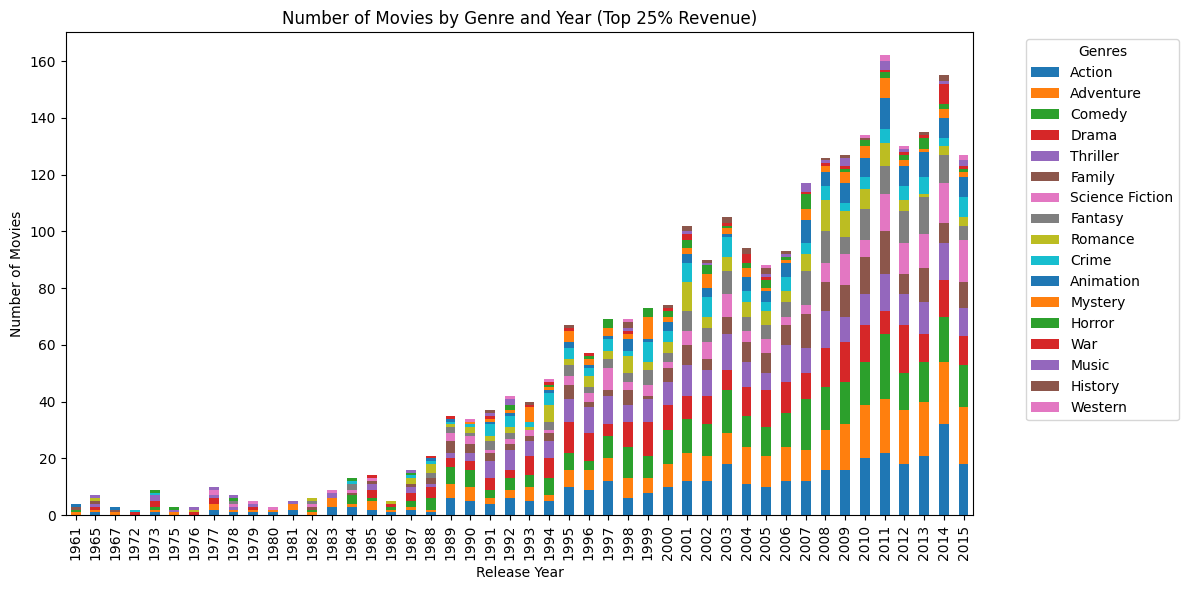

In [196]:
# Plot using Pandas' bar plot
gx = pivot_table_high_revenue.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    title="Number of Movies by Genre and Year (Top 25% Revenue)"
)

# Customize the plot
gx.set_xlabel("Release Year")
gx.set_ylabel("Number of Movies")
gx.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')
gx.figure.tight_layout()

The same image image in full size down as markdown:

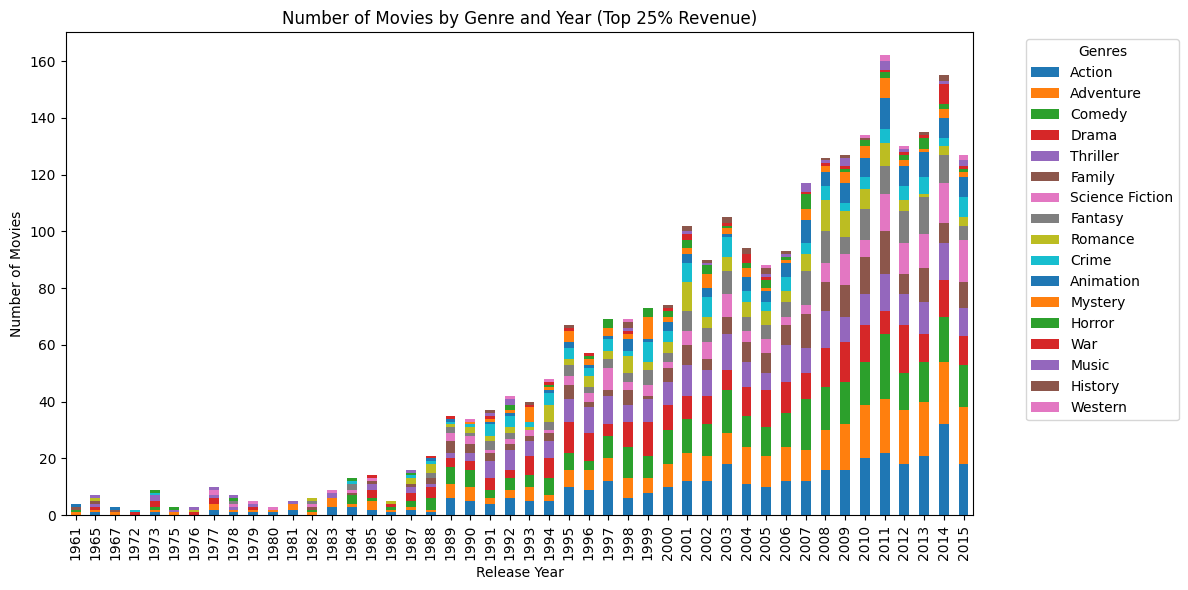

Now, for pie chart, I need to count the occurrences of each genre for pie chart

In [197]:
#Count the occurrences of each genre for pie chart
genre_counts_high_revenue_pie = high_revenue_df['genres'].value_counts()

Applying the function to group small genres into "Other" to avoid overlapping.

In [198]:
# Apply the function to group small genres into "Other"
grouped_data_high_revenue = group_small_categories(genre_counts_high_revenue_pie, threshold=0.02)

Ploting pie chart

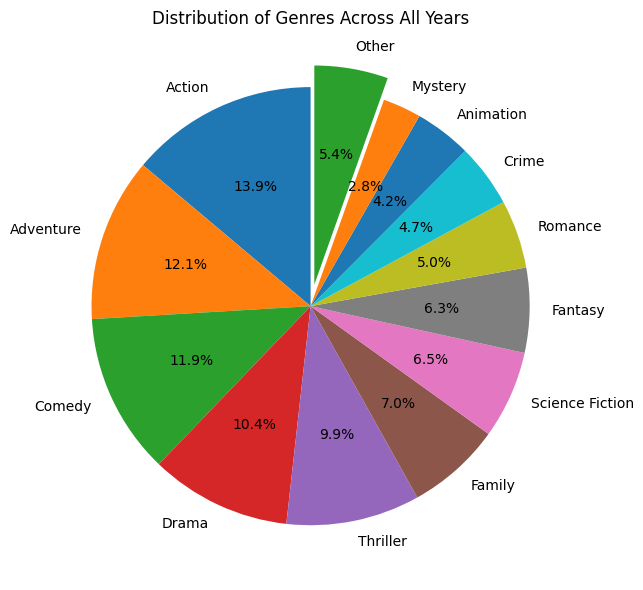

In [199]:
# Create the pie chart with pandas
hx = grouped_data_high_revenue.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    explode=[0.1 if genre == 'Other' else 0 for genre in grouped_data_high_revenue.index],
    figsize=(12, 6),
    title='Distribution of Genres Across All Years',
    ylabel=''  # Hide the y-label for aesthetics
)
hx.figure.tight_layout()

The same image image in full size down as markdown:

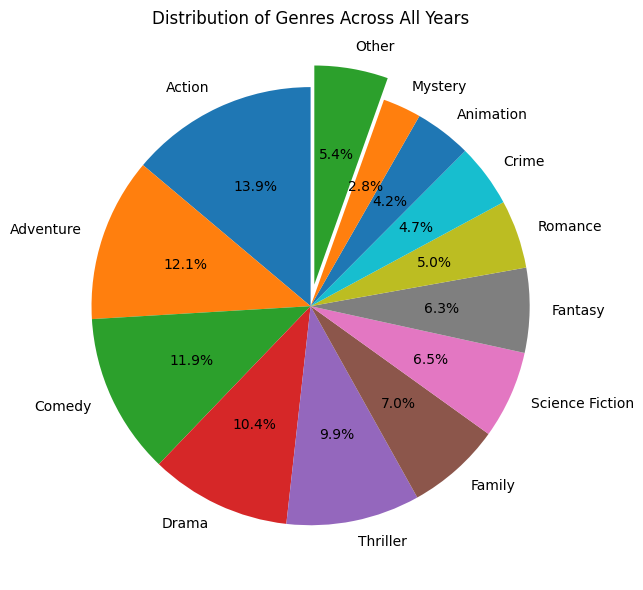

## Summary of findings:

This analysis explored key questions about the popularity of movie genres and the factors associated with high revenue films, leveraging data spanning several decades. The results provide valuable insights, while also highlighting certain limitations that warrant further investigation.

1) Genre Popularity Over Time:

1.1) Trends and Shifts: Drama consistently dominated as the most popular genre across decades, with notable competition from Comedy in specific periods, particularly during the late 1980s. In the mid-2010s, there was a surge in popularity for Action, Thriller, and Science Fiction, indicating a potential shift in audience preferences toward more dynamic and visually driven genres.

1.2) Proportional Analysis: Area and pie charts revealed proportional representation of genres, showing that while some genres, like Drama and Comedy, maintain consistent relevance, others fluctuate or emerge during specific periods.


2) Association of Genres with Revenue:

2.1) Films belonging to certain genres, such as Adventure and Action, were observed to be associated with higher revenues. However, disentangling the influence of individual genres proved challenging due to the multi-genre nature of most movies.

2.2) Statistical tests, including ANOVA, supported the hypothesis that certain genres significantly impact revenue.

3) Data Quality and Coverage:

3.1) While significant insights were drawn, the dataset's limitations, such as outdated records (last updated in 2015) and missing values in key columns like revenue and budget, affected the precision of the findings.

# Future Research Directions

1) Incorporating Recent Data: 
Expanding the dataset to include movies released after 2015 would allow for a more accurate reflection of current trends and audience preferences.

2) Enhanced Genre Analysis: 
Developing methods to better handle multi-genre movies, such as creating weighted popularity indices or examining genre overlaps, could yield more granular insights.

3) Exploring Audience Demographics:
Supplementing the dataset with demographic data (age, gender, geographic region) could help uncover how different groups influence movie popularity and revenue.

4) Accounting for External Factors:
Integrating additional variables like marketing budgets, critical reception, and competition from contemporaneous releases could improve the understanding of revenue and popularity dynamics.

5) Focus on Emerging Genres and Trends:
Investigating the rise of niche or previously underrepresented genres, especially in the context of global cinema, could add valuable depth to the analysis.

# Limitations:

1) Difficulty in Studying Individual Genres:
Analyzing individual genres in isolation poses a significant challenge because many movies belong to multiple genres simultaneously. This overlap complicates the measurement of each genre's true popularity. Even dividing the popularity index by the number of genres per movie before splitting the genre column does not fully resolve the issue. Such overlaps make it even more challenging to study relationships, potential causalities, and correlations between genres and other variables in the dataset.

2) Outdated Data:
The dataset's most recent records date back to 2015, which is nearly a decade old. The absence of recent data limits the ability to assess current trends and audience preferences, making the analysis less relevant for understanding the modern film industry.

3) Missing and Zero Values in Key Columns:
Despite cleaning the data, many movies still have revenue or budget values recorded as zero or missing. This affects the accuracy of statistical analyses and correlations, as these values may not accurately represent the movies' true financial performance.

4) Lack of Audience Demographic Data:
The dataset does not provide information about audience demographics, such as age, gender, or geographic location. Without this context, it's difficult to determine how different groups influence the popularity or success of various genres.

5) Simplified Popularity Metric:
The popularity metric in the dataset is a single aggregated value, which might not fully capture nuances such as regional popularity, critical reception, or social media trends. This simplification may lead to incomplete or skewed insights

6) Absense of of Contextual Variables:
The dataset lacks contextual variables like marketing budgets, competition from other films released in the same period, feeling of users (which could be mapped by AI tools) or global events that might have influenced a movie's popularity or revenue. These external factors could significantly affect the analysis but are not accounted for.

<a id='conclusions'></a>
# Conclusions

This project successfully addressed the initial research questions, shedding light on long-term trends in genre popularity and their relationship with movie revenue. While the findings offer a robust starting point, the identified limitations suggest that further research and enriched datasets are essential for deeper and more precise insights into the evolving dynamics of the film industry.

In [200]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 8 image(s).
[NbConvertApp] Writing 2168514 bytes to Investigate_a_Dataset.html
